## Final Project Submission

* __Student name__: Hannah Kwirikia
* __Student pace__: full time
* __Scheduled project review date/time__: 20th Nov.2022/ 11:59PM
* __Instructor name__: Mark Tiba 
* __Blog post URL__:


# Microsoft's Movie Market Analysis - Exploratory Data Analysis

## Introduction

Microsoft has decided to venture into the movie market. They are looking to start creating original films. On the filpside, the company has no knowledge about the movie market.

This exploratory data analysis aims at using existing film data to find out what types of films are at leading in the market today, amongst other features that affect movie performance.

## Research Objective

- To find out what types of films are currently doing the best at the box office in terms of sales, ratings, and genres.

## Analysis Plan

The analysis entails the following steps:
    
1. Import data
2. Unzip data
3. Merge datasets
4. Data cleaning
4. Data visualization

## Research Questions

1. What effect does the ratings have on movie performance at the box office?
2. What are the best performing movie genres at the box office?
3. What are the best performing studios at the movie box office?

## Data Description

This project uses two datasets namely:
- __im.db.zip__ extracted from __Box Office__
- __boom.movie_gross.csv.gz__ extracted from __IMDB__



In [3]:
cd C:\\Users\\Win 10 Pro\\Desktop\\dsc-phase-1-project-v2-4\\zippedData

C:\Users\Win 10 Pro\Desktop\dsc-phase-1-project-v2-4\zippedData


## Import Libraries

In [4]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from collections import Counter
%matplotlib inline

### Import and Unzip First Dataset (im.db.zip)

In [5]:
#to unzip IMDB file
import zipfile
with zipfile.ZipFile('im.db.zip', 'r') as my_zip:
    my_zip.extractall('files') # the unzipped files are now in a folder named files

In [6]:
cd C:\\Users\\Win 10 Pro\\Desktop\\dsc-phase-1-project-v2-4\\zippedData\\files

C:\Users\Win 10 Pro\Desktop\dsc-phase-1-project-v2-4\zippedData\files


In [7]:
#to view list of tables
conn = sqlite3.connect('im.db')
cur = conn.cursor()
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

The tables for the 'movie_basics' and 'movie_ratings' are the most important. We will look at them below.

#### movie_basics table preview

In [8]:
#to view the movie_basics table
movie_basics = pd.read_sql("""SELECT * FROM movie_basics;""", conn )
movie_basics.head(3)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


#### movie_ratings table

In [9]:
#to view the movie_ratings table
movie_ratings = pd.read_sql("""SELECT * FROM movie_ratings;""", conn )
movie_ratings.head(3)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


#### Merging movie_basics and movie_ratings table

In [10]:
#merge movie_basics and movie_ratings tables
merged_movies = pd.merge(left=movie_basics, right=movie_ratings, on='movie_id')
merged_movies.head(3)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517


### Import and Unzip Second Dataset(boom.movie_gross.csv.gz)

In [11]:
cd C:\\Users\\Win 10 Pro\\Desktop\\dsc-phase-1-project-v2-4\\zippedData

C:\Users\Win 10 Pro\Desktop\dsc-phase-1-project-v2-4\zippedData


In [12]:
#unzip .gz file
import gzip
with gzip.open('bom.movie_gross.csv.gz') as f:

    bom_df = pd.read_csv(f)

#### Preview Second Dataset

In [13]:
#preview the data 
bom_df.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


In [14]:
#rename title column to primary_title to enable merging with first dataset
bom_df.rename(columns = {'title':'primary_title'}, inplace = True)
bom_df.head(3)

,primary_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


### Merge First Data with Second Data

In [15]:
#merge first data with second data
df = pd.merge(left = merged_movies, right = bom_df, on = 'primary_title')
df.head(3)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012


In [16]:
#learn more about the data
df.shape

(3027, 12)

The merged data has 3027 rows and 12 columns

In [17]:
#summary of the data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         3027 non-null   object 
 1   primary_title    3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           3020 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   int64  
 8   studio           3024 non-null   object 
 9   domestic_gross   3005 non-null   float64
 10  foreign_gross    1832 non-null   object 
 11  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 307.4+ KB


## Data Cleaning

The data cleaning process will entail three main steps:
- looking for duplicates
- looking for missing values
- check outliers

### Look for any duplicates

Below I defined a function to detect duplicates.

In [18]:
# Duplicated entries
def identify_duplicates(data):
    """A function to identify any duplicates"""
    # identify the duplicates 
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. 
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.") 



identify_duplicates(df)

The Data has no duplicates


#### Check for Duplicates in the Primary Key column
Columns that have unique details such as the primary_title should not contain any duplicates

In [19]:
def unique_column_duplicates(data, column):
    """handling duplicates in unique column"""
    # empty list to store the duplicate bools
    duplicates = []
    for i in data[column].duplicated():
        duplicates.append(i)
    
    # identify if there are any duplicates
    duplicates_set = set(duplicates)
    if (len(duplicates_set) == 1):
        print(f"The column {column.title()} has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        print(f"The column {column.title()} has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.")


unique_column_duplicates(df, "primary_title")

The column Primary_Title has 429 duplicated rows.
This constitutes 14.172% of the data set.


Because the primary_title are our unique identifiers,  are unique. Thus we need to remove any duplicates

In [20]:
# removing duplicates in primary_title column 
def remove_unique_column_duplicates(data, column):
    """Simple Function to remove duplicated rows"""
    data.drop_duplicates(subset=column, keep="first", inplace=True)
    # confirm if the duplicated rows have been removed
    confirm = unique_column_duplicates(df, "primary_title")

    return confirm 


remove_unique_column_duplicates(df, "primary_title")

The column Primary_Title has no duplicates


The duplicates along the primary_title column have now been removed.

### Percentage of missing values per column

In [21]:
# identify missing 
def identify_missing_values(data):
    """Identify is the data has missing values"""
    # identify if data has missing values(data.isnull().any())
    # empty dict to store missing values
    missing = []
    for i in data.isnull().any():
        # add the bool values to empty list 
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values")
    else:
        out = print("The Data has missing values.")

    return out


identify_missing_values(df)

The Data has missing values.


In [22]:
#identify missing values
def missing_values(data):
    """A simple function to identify data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_data = missing_values(df)
missing_data

,Missing Values,Percentage(%)
foreign_gross,1040,0.400308
domestic_gross,17,0.006543
runtime_minutes,14,0.005389
studio,3,0.001155
genres,1,0.000385


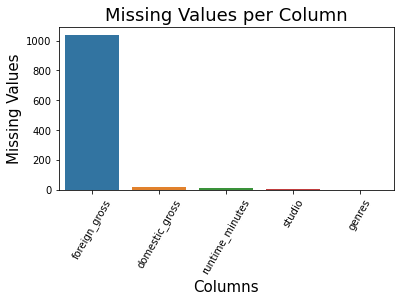

In [23]:
def graph_missing(data):
    """Graphically represent the missing values"""
    fig, axes = plt.subplots(figsize = (6, 3))

    sns.barplot(x = data.index , y = data["Missing Values"]) 
    plt.xlabel("Columns", fontdict={"color": "black",  "size": 15}) 
    plt.xticks(rotation = '60') 
    plt.ylabel("Missing Values", fontdict={"color": "black",  "size": 15}) 
    plt.title("Missing Values per Column", fontsize = 18)
    plt.show()

    # save the plot 
    fig.savefig("missing.png")


graph_missing(missing_data)

Since there are only 3 rows missing in the studio, we can drop those.

In [24]:
df = df.dropna(subset=['studio'])

Since there are only 1 row missing in the genre, we can drop that.

In [25]:
df = df.dropna(subset=['genres'])

The domestic_gross column has less than 1% (17 values) missing values. Thus, we will replace the missing value by the mean domestic_gross income.

In [26]:
#replace missing values in domestic_gross with mean
df['domestic_gross'] = df['domestic_gross'].fillna(df['domestic_gross'].mean())

The runtime_minutes column also has less than 1%(14 values) of missing values. Thus, we will replace the missing value by the mean runtime_minutes.

In [27]:
#replace missing values in runtime_minutes with mean
df['runtime_minutes'] = df['runtime_minutes'].fillna(df['runtime_minutes'].mean())

The foreign_gross column  has the highest number of missing values at about 40%. That is a very large percentage of missing values. Thus, we drop that column.

In [28]:
df.drop(columns = 'foreign_gross', inplace = True)

### Check for Outliers

#### Define a Funtion to Detect Outliers

In [29]:
def IQR_outliers(data, column):
    """Simple function to identify and remove outliers using IQR"""
    # get Q1 and Q2
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    # calculate IQR
    IQR = Q3-Q1
    # identify ouliers (returns True if an outlier)
    out = ((data[column]<(Q1-1.5*IQR)) | (data[column]>(Q3+1.5*IQR)))

    # identify the outlier using index
    outliers_list = list(out[out==True].index)
    # identify the actual outliers using index
    outliers = []
    for val in outliers_list:
        outliers.append(data[column][val])

    
    return outliers, Q1, Q3, IQR


##### 1. domestic_gross outliers

In [58]:
domestic_gross_outliers = IQR_outliers(df, "domestic_gross")
domestic_gross_outliers[0][:10]

[652300000.0,
 110800000.0,
 200800000.0,
 100200000.0,
 85500000.0,
 415000000.0,
 182200000.0,
 149300000.0,
 412600000.0,
 125000000.0]

In [59]:
def IQR_outliers(data, column):
    """Simple function to identify and remove outliers using IQR"""
    # get Q1 and Q2
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    # calculate IQR
    IQR = Q3-Q1
    # identify ouliers (returns True if an outlier)
    out = ((data[column]<(Q1-1.5*IQR)) | (data[column]>(Q3+1.5*IQR)))

    # identify the outlier using index
    outliers_list = list(out[out==True].index)
    # identify the actual outliers using index
    outliers = []
    for val in outliers_list:
        outliers.append(data[column][val])

    
    return outliers, Q1, Q3, IQR


domestic_gross_outliers = IQR_outliers(df, "domestic_gross")
domestic_gross_outliers[0][:10]

[652300000.0,
 110800000.0,
 200800000.0,
 100200000.0,
 85500000.0,
 415000000.0,
 182200000.0,
 149300000.0,
 412600000.0,
 125000000.0]

The domestic_gross_outliers are possible values thus we will leave them as they are. 

##### 2. start year outliers

The start year has no outliers as shown below

In [32]:
start_year_outliers = IQR_outliers(df, "start_year")
start_year_outliers[0]

[]

<AxesSubplot:xlabel='start_year'>

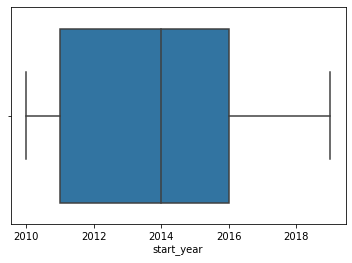

In [33]:
# use a box plot to identify outliers

sns.boxplot(data=df, x="start_year")

##### 3. Runtime minutes outliers

In [60]:
runtime_minutes_outliers = IQR_outliers(df, "runtime_minutes")
runtime_minutes_outliers[0][:10]

[169.0, 169.0, 180.0, 165.0, 161.0, 272.0, 163.0, 164.0, 172.0, 157.0]

The runtime_minutes_outliers are possible values thus we will leave them as they are.

##### 4. averagerating outliers

In [61]:
averagerating_outliers = IQR_outliers(df, "averagerating")
averagerating_outliers[0][:10]

[3.8, 4.0, 3.5, 3.3, 4.1, 4.3, 4.2, 4.3, 4.3, 4.3]

The averagerating_outliers are possible values thus we will leave them as they are. This is further backed by the box plot above.

##### 5. numvotes outliers

In [62]:
numvotes_outliers = IQR_outliers(df, "numvotes")
numvotes_outliers[0][:10]

[275300,
 539338,
 366366,
 241792,
 195889,
 235256,
 283534,
 682218,
 228701,
 339338]

The numvotes_outliers are possible values thus we will leave them as they are. 

##### 6. year outliers

In [37]:
year_outliers = IQR_outliers(df, "year")
year_outliers[0]

[]

<AxesSubplot:xlabel='year'>

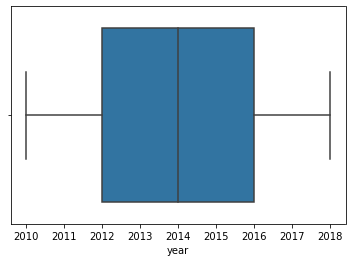

In [38]:
# use a box plot to identify outliers

sns.boxplot(data=df, x="year")

The start year has no outliers as shown above

### Final Data

In [39]:
#preview first 5 rows
df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,2013
5,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,2014
6,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,2015


In [40]:
#checking for missing values
df.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
studio             0
domestic_gross     0
year               0
dtype: int64

The data now has no missing values. 

## Exploratory Analysis and visualization

This section answers the research questions using various visualizations. 

### RQ1: What Effect Does the Ratings and Start Year have on Movie Performance?

####  Explore effect of  Average Rating on Domestic Gross

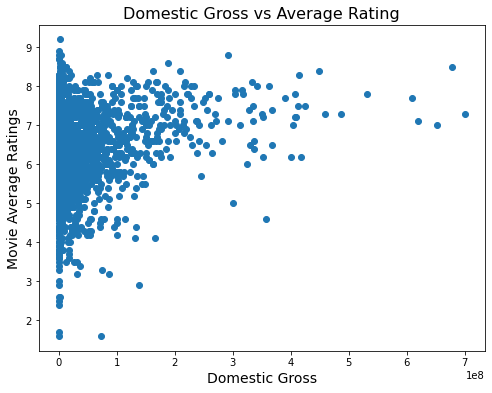

In [41]:
# plotting a scatterplot

fig, ax= plt.subplots(figsize=(8,6))

x = df['domestic_gross']
y = df['averagerating']

ax.scatter(x,y)

ax.set_title('Domestic Gross vs Average Rating', fontsize=16)
ax.set_xlabel("Domestic Gross",fontsize=14)
ax.set_ylabel("Movie Average Ratings", fontsize=14)
fig.savefig('Domestic Gross vs Average Rating.png');

There is a positive relationship between domestic gross and average rating. As the rating increase, the domestic gross also increases.

#### ####  Explore effect of  Start Year of a Film on Domestic Gross

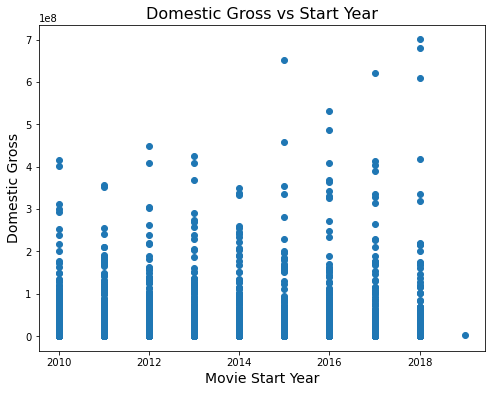

In [42]:
# plotting a scatterplot

fig, ax= plt.subplots(figsize=(8,6))

y = df['domestic_gross']
x = df['start_year']

ax.scatter(x,y)

ax.set_title('Domestic Gross vs Start Year', fontsize=16)
ax.set_ylabel("Domestic Gross",fontsize=14)
ax.set_xlabel("Movie Start Year", fontsize=14)
fig.savefig('Domestic Gross vs Start Year.png');

There is a positive relationship between the movie start year and domestic gross. The more recent a movie, the higher the gross.

### RQ2: What are the Best Performing Movie Genres in Box office?


In [43]:
#sort movies from ones with highest domestic gross
best_movies_genre = df.sort_values('domestic_gross',ascending = False).reset_index(drop=True)

In [64]:
# accessing the individual genre element per row

movie_genres = []

for genre in best_movies_genre['genres']:
    movie_genres.append(genre.split(','))
movie_genres[:10]

[['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Animation'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Animation', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Thriller'],
 ['Action', 'Adventure', 'Sci-Fi']]

In [65]:
# accessing all genre elements in the rows

movie_genres_elements = []

for data in movie_genres:
    for item in data:
        movie_genres_elements.append(item)

movie_genres = movie_genres_elements[:100]
movie_genres[:10]

['Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action']

In [46]:
# accessing all the unique genres in the rows

unique_movie_genres = []

for item in movie_genres:
    if item not in unique_movie_genres:
        unique_movie_genres.append(item)
        
unique_movie_genres[:100]

['Action',
 'Adventure',
 'Sci-Fi',
 'Fantasy',
 'Animation',
 'Comedy',
 'Thriller',
 'Drama',
 'Sport',
 'Crime',
 'Biography',
 'Horror']

In [47]:
# finding number of films were made per genre

film_count = Counter(movie_genres)
film_count

Counter({'Action': 26,
         'Adventure': 29,
         'Sci-Fi': 13,
         'Fantasy': 4,
         'Animation': 7,
         'Comedy': 10,
         'Thriller': 3,
         'Drama': 3,
         'Sport': 1,
         'Crime': 2,
         'Biography': 1,
         'Horror': 1})

In [48]:
# separating the genres and the count

genre = []
count = []

for key, values in film_count.items():
    genre.append(key)
    count.append(values)

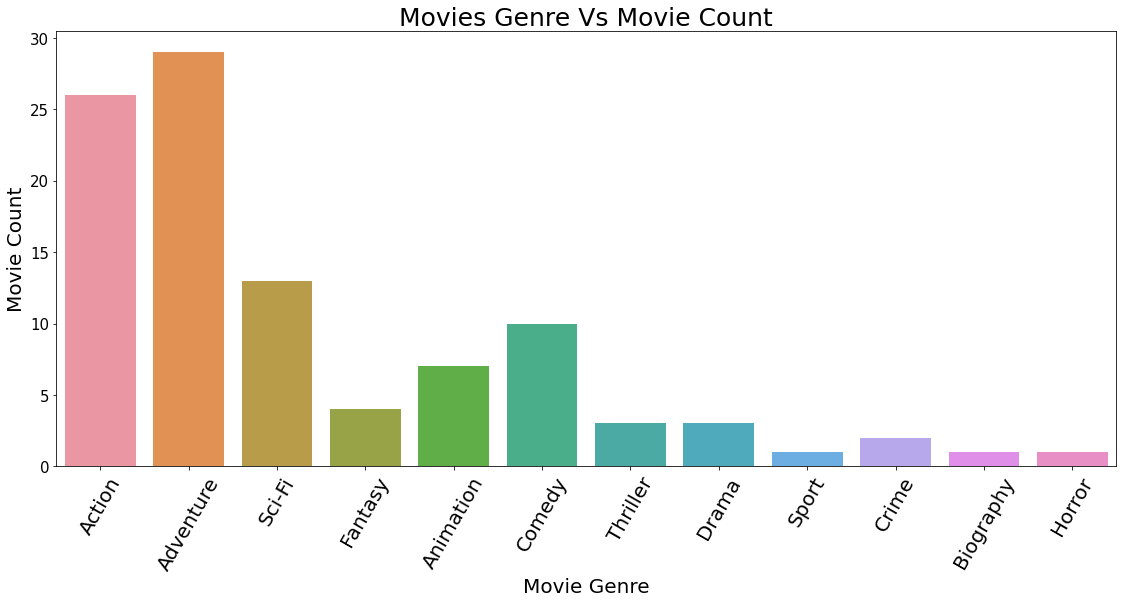

In [49]:
# plotting the data for movies vs count

fig, ax = plt.subplots(figsize=(19,8))

x = genre
y = count

ax = sns.barplot(x = x, y = y, ax = ax)

ax.set_title('Movies Genre Vs Movie Count', fontsize=25)
ax.set_xlabel("Movie Genre",fontsize=20)
ax.set_ylabel("Movie Count", fontsize=20);

ax.tick_params(axis='x', labelrotation = 60, labelsize = 20)
ax.tick_params(axis='y', labelsize = 15)
fig.savefig('Movies Genres Vs Movie Count.png');

From the above bar graph, it is clear that among the top 100 movies based on domestic gross, the 3 best performing genres are:
1. Adventure with 27 films
2. Action with 21 films
3. Sci-Fi with 13  

### RQ3: Who is the Biggest Competitor at Box Office?

In [66]:
#sorting to find studios with highest domestic_gross per genre
gross_by_studio = df.sort_values('domestic_gross',ascending = False).reset_index(drop=True)
gross_by_studio.loc[:, ["domestic_gross", "studio"]].head(10)

,domestic_gross,studio
0,700100000.0,BV
1,678800000.0,BV
2,652300000.0,Uni.
3,620200000.0,BV
4,608600000.0,BV
5,532200000.0,BV
6,486300000.0,BV
7,459000000.0,BV
8,448100000.0,WB
9,424700000.0,LGF


In [51]:
# a list of the top 100 studios based on top 100 movies
x_list =list(gross_by_studio['studio'])[:100]


In [52]:
#domestic gross of studios for the top 100 movies
y_list =gross_by_studio['domestic_gross'][:100]

In [67]:
#create a dataframe of the top performing studios based on domestic gross
d = {'studio': x_list, 'gross': y_list}
df_g = pd.DataFrame(d)
df_g.head()

,studio,gross
0,BV,700100000.0
1,BV,678800000.0
2,Uni.,652300000.0
3,BV,620200000.0
4,BV,608600000.0


In [54]:
#finding number of studios that produced top 100 movies
studio_count = Counter(df_g['studio'])
studio_count

Counter({'BV': 34,
         'Uni.': 14,
         'WB': 13,
         'LGF': 4,
         'Sony': 7,
         'Fox': 9,
         'P/DW': 4,
         'WB (NL)': 4,
         'Par.': 10,
         'Sum.': 1})

In [55]:
# separating the studios and the count

studio = []
count = []

for key, values in studio_count.items():
    studio.append(key)
    count.append(values)

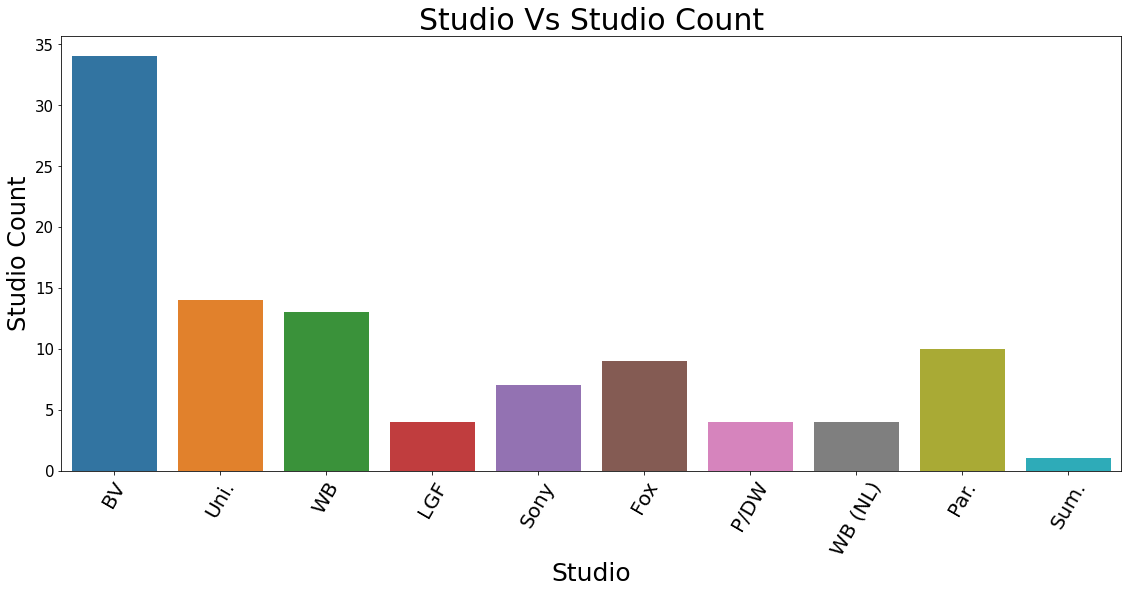

In [56]:
# plotting the data for studios vs count

fig, ax = plt.subplots(figsize=(19,8))

x = studio
y = count

ax = sns.barplot(x = x, y = y, ax = ax)

ax.set_title('Studio Vs Studio Count', fontsize=30)
ax.set_xlabel("Studio",fontsize=25)
ax.set_ylabel("Studio Count", fontsize=24);

ax.tick_params(axis='x', labelrotation = 60, labelsize = 20)
ax.tick_params(axis='y', labelsize = 15)
fig.savefig('Studio Vs Studio Count.png');

The biggest competition in terms of movie with highest gross income are BV with 38 top 100 movies, Uni with 13, and WB with 14.

## Conclusion

Based on the research above, it is evident that average ratings and start year are positively correlated with domestic gross income. Domestic gross increases with higher average ratings. Movies produced in the recent years also have higher gross income than those which started several years ago. 

The 3 best performing movie genres are Adventure, Action, and Sci-Fi. And finally, the movie studio should be ready to compete with the 3 top producting studios which are BV, Uni, and WB